## Vanilla GPT API call

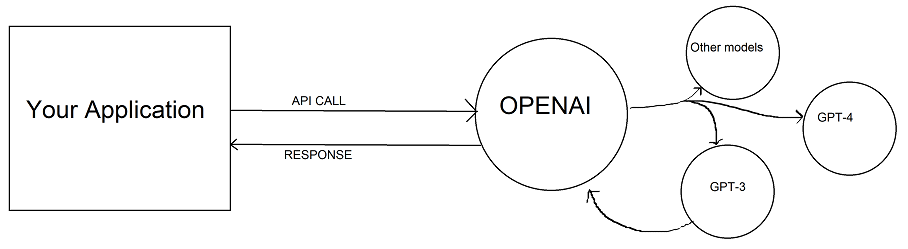

In [ ]:
!pip install openai

In [1]:
import os
import openai
openai.api_key = "GET YOU API KEY FROM OPENAI https://platform.openai.com/docs/api-reference"


response = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
   messages=[
        {"role": "user", "content": "what is my name"},],
  temperature=0.9,
  max_tokens=150,
)
print(response.choices[0].message["content"])

I am sorry, but I am an AI language model and I do not have access to personal information. I do not know your name unless you tell me.


#### It doesnt have memory or ability to search web or save and load data from a database. To solve our issues we will use Langchain Library

# Langchain

LangChain is a framework that enables developers to build agents that can reason about problems and break them into smaller sub-tasks. With LangChain, we can introduce context and memory into completions by creating intermediate steps and chaining commands together

#### lets see some examples where using langchain can be simple and more helpful

# 1. Loading a Research Paper and doing quesion answers on it

In [ ]:
!pip install langchain
!pip install unstructured
!pip install unstructured[local-inference]
!pip install chroma

#### Loading a PDF

In [2]:
from langchain.document_loaders import UnstructuredPDFLoader
loader = UnstructuredPDFLoader("HydrogenFuel.pdf",strategy="fast")

data = loader.load()
print (f'You have {len(data)} document(s) in your data')
print (f'There are {len(data[0].page_content)} characters in your document')

You have 1 document(s) in your data
There are 68611 characters in your document


In [3]:
data[0]

Document(page_content='Hydrogen and Fuel Cells for Data Center Applications Project Meeting: Workshop Report Genevieve Saur,1 Vanessa Arjona,2 Amberlie Clutterbuck,2 and Eric Parker2\n\n1 National Renewable Energy Laboratory 2 U.S. Department of Energy Fuel Cell Technologies Office\n\nNREL is a national laboratory of the U.S. Department of Energy Office of Energy Efficiency & Renewable Energy Operated by the Alliance for Sustainable Energy, LLC\n\nTechnical Report NREL/TP-5400-75355 December 2019\n\nThis report is available at no cost from the National Renewable Energy Laboratory (NREL) at www.nrel.gov/publications.\n\nContract No. DE-AC36-08GO28308\n\nHydrogen and Fuel Cells for Data Center Applications Project Meeting: Workshop Report Genevieve Saur,1 Vanessa Arjona,2 Amberlie Clutterbuck,2 and Eric Parker2\n\n1 National Renewable Energy Laboratory 2 U.S. Department of Energy Fuel Cell Technologies Office\n\nSuggested Citation Saur, Genevieve, Vanessa Arjona, Amberlie Clutterbuck, an

####  Chunk your data up into smaller documents

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(data)
print (f'Now you have {len(texts)} chunks')

Now you have 97 chunks


In [5]:
texts[0].page_content

'Hydrogen and Fuel Cells for Data Center Applications Project Meeting: Workshop Report Genevieve Saur,1 Vanessa Arjona,2 Amberlie Clutterbuck,2 and Eric Parker2\n\n1 National Renewable Energy Laboratory 2 U.S. Department of Energy Fuel Cell Technologies Office\n\nNREL is a national laboratory of the U.S. Department of Energy Office of Energy Efficiency & Renewable Energy Operated by the Alliance for Sustainable Energy, LLC\n\nTechnical Report NREL/TP-5400-75355 December 2019\n\nThis report is available at no cost from the National Renewable Energy Laboratory (NREL) at www.nrel.gov/publications.\n\nContract No. DE-AC36-08GO28308\n\nHydrogen and Fuel Cells for Data Center Applications Project Meeting: Workshop Report Genevieve Saur,1 Vanessa Arjona,2 Amberlie Clutterbuck,2 and Eric Parker2\n\n1 National Renewable Energy Laboratory 2 U.S. Department of Energy Fuel Cell Technologies Office'

#### Create embeddings of your documents to get ready for semantic search

In [6]:
from langchain.embeddings.openai import OpenAIEmbeddings
OPENAI_API_KEY= "GET YOU API KEY FROM OPENAI https://platform.openai.com/docs/api-reference"

embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

#### Uploading our embeddings to a vector database

In [7]:
from langchain.vectorstores import Chroma
docsearch = Chroma.from_texts([t.page_content for t in texts], embeddings)

Using embedded DuckDB without persistence: data will be transient


In [8]:
docs = docsearch.similarity_search("fuel cell", include_metadata=True,k=2)
docs

[Document(page_content='10 Some fuel cell varieties internally reform natural gas and require a feedstock such as natural gas or biogas. Other varieties use external reforming of natural gas and the fuel cell stack is fed pure hydrogen and air. Fuel cell varieties where the stack uses pure hydrogen could run off natural gas or hydrogen, but individual companies may not offer all configurations.\n\nThis report is available at no cost from the National Renewable Energy Laboratory (NREL) at www.nrel.gov/publications.\n\n13\n\nUninterruptable power supply battery sizes would be significantly reduced, therefore\n\nlowering capital and maintenance cost and time.\n\nLiquid-cooled data centers could make use of low-quality heat for data center cooling or\n\ndehumidification.', metadata={}),
 Document(page_content='Fuel cells can be used to support critical loads for energy reliability, security, sustainability, and economic benefit. They offer potential for backup or prime power, microgrids, g

In [ ]:
len(docs)

#### creating a qa bot

In [9]:
from langchain.llms import OpenAI
from langchain import VectorDBQA

In [10]:
llm = OpenAI(
    temperature=0.7, # This values controls the randomness in the response the closer to 1 the more random responses
    openai_api_key=OPENAI_API_KEY)

In [11]:
qa = VectorDBQA.from_chain_type(llm=llm, chain_type="map_reduce", vectorstore=docsearch, return_source_documents=True)

C:\ProgramData\Anaconda3\envs\uplang\lib\site-packages\langchain\chains\retrieval_qa\base.py:201: UserWarning: `VectorDBQA` is deprecated - please use `from langchain.chains import RetrievalQA`
  warnings.warn(


In [12]:
response = qa({"query": "what is hydrogen fuel cell"})

print(response['result'])
print('\n')
print(response['source_documents'])

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: The server had an error while processing your request. Sorry about that!.


 A hydrogen fuel cell is an energy storage device that produces electricity from the energy released by a chemical reaction between hydrogen and oxygen. It is used for a variety of applications such as powering vehicles, providing backup power for data centers, and in stationary power systems.


[Document(page_content='Fuel cells can be used to support critical loads for energy reliability, security, sustainability, and economic benefit. They offer potential for backup or prime power, microgrids, grid support, and combined heat and power applications in the data center.\n\nThis project meeting engaged stakeholders from various areas within the data center and hydrogen and fuel cells industries to discuss the suitability and needs of hydrogen fuel cell systems in supplying prime or backup power to critical loads of data centers. By bringing together knowledgeable stakeholders from data center as well as hydrogen storage and fuel cell industries, this workshop aimed to identify the resea

# 2. Building a bot with internet access 

In [13]:
import os
os.environ["SERPAPI_API_KEY"] = "GET YOU API KEY FOR SEARCHING GOOGLE FROM SERP API https://serpapi.com/users/welcome"

In [ ]:
!pip install google-search-results

In [14]:
from langchain.llms.openai import OpenAI
from langchain.agents import initialize_agent, Tool
from langchain.agents import ZeroShotAgent, Tool, AgentExecutor
from langchain import LLMChain, PromptTemplate
from langchain.utilities import SerpAPIWrapper
from langchain.memory import ConversationBufferMemory, ReadOnlySharedMemory

In [15]:
llm = OpenAI(temperature=0,openai_api_key=OPENAI_API_KEY)
search = SerpAPIWrapper()
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search"
    )
]

In [16]:
template = """This is a conversation between a human and a bot:

{chat_history}

Write a summary of the conversation for {input}:
"""
prompt = PromptTemplate(
    input_variables=["input", "chat_history"], 
    template=template
)
memory = ConversationBufferMemory(memory_key="chat_history")
readonlymemory = ReadOnlySharedMemory(memory=memory)
summry_chain = LLMChain(
    llm=llm, 
    prompt=prompt, 
    verbose=True, 
    memory=readonlymemory, # use the read-only memory to prevent the tool from modifying the memory
)

In [17]:
prefix = """Have a conversation with a human, answering the following questions as best you can. You can answer any question
You have access to the following tools:
"""
suffix = """Begin!"
{chat_history}
Question: {input}
{agent_scratchpad}
"""

prompt = ZeroShotAgent.create_prompt(
    tools, 
    prefix=prefix, 
    suffix=suffix, 
    input_variables=["input", "chat_history", "agent_scratchpad"]
)


In [18]:
llm_chain = LLMChain(llm=llm, prompt=prompt)
agent = ZeroShotAgent(llm_chain=llm_chain, tools=tools, verbose=True)
agent_chain = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True, memory=memory)

In [19]:
agent_chain.run("who is the ceo of twitter")



> Entering new AgentExecutor chain...
Thought: I need to find out who the CEO of Twitter is
Action: Intermediate Answer
Action Input: Who is the CEO of Twitter
Observation: Linda Yaccarino
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: The server had an error while processing your request. Sorry about that!.


I now know the final answer
Final Answer: Linda Yaccarino is the CEO of Twitter.

> Finished chain.


'Linda Yaccarino is the CEO of Twitter.'